<a href="https://colab.research.google.com/github/bhavy-garg/Time-Series-Prediction/blob/main/gradient_boosting_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
data = pd.read_excel('DATASET.xlsx')
data = data.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])


In [14]:
data.fillna(0, inplace=True)
data.head(10)

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,0,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,0,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,0,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,0,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,0,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,0,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,0,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,0,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,0,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [15]:
j = 0
for i in range(100):
  data.iloc[j:j + 10, 0] = data.iloc[j, 0]
  j += 10

test_data = data.loc[data['year'] == 10]
test_data

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
data.columns = data.columns.str.replace('Unnamed: 0', 'Group')
test_data.columns = test_data.columns.str.replace('Unnamed: 0', 'Group')
regr = GradientBoostingRegressor(random_state=30, verbose=1)

In [29]:
data_name=[]
data_name.append('Para-9')
data_name.append('Para-10')
data_name.append('Para-11')
data_name.append('Para-12')
data_name.append('Para-13')
n = 0
ind = 0
root_mean = []
data_pre = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
list=[10, 11, 12, 13, 14]
for j in list:
  a = 0
  co = 0
  for i in range(0, 1000, 10):
    x_testing = data.iloc[i+9, 1:10].to_numpy()
    y_testing = data.iloc[i+9, j]
    x_training = data.iloc[i:i+9, 1:10]
    y_training = data.iloc[i:i+9, j]
    regr.fit(x_training, y_training)
    y_pre = regr.predict(x_testing.reshape(1,-1))[0]
    data_pre[data_name[ind]].append(y_pre)
    a += (y_testing - y_pre)*(y_testing - y_pre)
    co += 1
    n += 1
  root_mean.append(a)
  ind += 1

      Iter       Train Loss   Remaining Time 
         1           0.9158            0.13s
         2           0.7418            0.12s
         3           0.6009            0.12s
         4           0.4867            0.11s
         5           0.3942            0.11s
         6           0.3193            0.10s
         7           0.2586            0.10s
         8           0.2095            0.11s
         9           0.1697            0.10s
        10           0.1375            0.11s
        20           0.0167            0.06s
        30           0.0020            0.04s
        40           0.0002            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         539.5540            0.07s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 


         1           0.0000            0.05s
         2           0.0000            0.10s
         3           0.0000            0.08s
         4           0.0000            0.08s
         5           0.0000            0.09s
         6           0.0000            0.08s
         7           0.0000            0.07s
         8           0.0000            0.07s
         9           0.0000            0.06s
        10           0.0000            0.06s
        20           0.0000            0.07s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0216            0.45s
         2           0.0175            0.26s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.04s
         2           0.0000            0.11s
         3           0.0000            0.08s
         4           0.0000            0.09s
         5           0.0000            0.08s
         6           0.0000            0.07s
         7           0.0000            0.07s
         8           0.0000            0.07s
         9           0.0000            0.06s
        10           0.0000            0.06s
        20           0.0000            0.05s
        30           0.0000            0.04s
        40           0.0000            0.03s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.06s
         2           0.0000            0.09s
         3           0.0000            0.10s
         4           0.0000            0.10s
         5           0.0000            0.09s
         6           0.0000            0.08s
         7           0.0000            0.09s
         8           0.0000            0.08s
         9           0.0000            0.08s
        10           0.0000            0.08s
        20           0.0000            0.06s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       10

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          60.0926            0.12s
         2          48.6750            0.18s
         3          39.4268            0.15s
         4          31.9357            0.14s
         5          25.8679            0.13s
         6          20.9530            0.12s
         7          16.9719            0.12s
         8          13.7473            0.12s
         9          11.1353            0.11s
        10           9.0196            0.11s
        20           1.0966            0.06s
        30           0.1333            0.04s
        40           0.0162            0.03s
        50           0.0020            0.02s
        60           0.0002            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        90           0.0001            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0128            0.14s
         2           0.0104            0.09s
         3           0.0084            0.09s
         4           0.0068            0.12s
         5           0.0055            0.10s
         6           0.0045            0.10s
         7           0.0036            0.09s
         8           0.0029            0.08s
         9           0.0024            0.08s
        10           0.0019            0.08s
        20           0.0002            0.07s
        30           0.0000            0.06s
        40           0.0000            0.05s
        50           0.0000            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1       13700.2511            0.33s
         2       11101.4361            0.23s
         3        8996.0416            0.19s
         4        7287.7715            0.17s
         5        5905.5889            0.16s
         6        4785.6983            0.15s
         7        3876.9468            0.14s
         8        3140.8576            0.14s
         9        2545.2872            0.13s
        10        2062.6008            0.13s
        20         251.6683            0.07s
        30          30.7449            0.05s
        40           3.7600            0.03s
        50           0.4602            0.03s
        60           0.0564            0.02s
        70           0.0069            0.01s
        80           0.0008            0.01s
        90           0.0001            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        60           0.0105            0.02s
        70           0.0013            0.02s
        80           0.0002            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          45.7614            0.20s
         2          37.0667            0.16s
         3          30.0241            0.14s
         4          24.3195            0.14s
         5          19.6988            0.13s
         6          15.9560            0.13s
         7          12.9244            0.12s
         8          10.4687            0.12s
         9           8.4797            0.11s
        10           6.8685            0.11s
        20           0.8351            0.06s
        30           0.1015            0.05s
        40           0.0123            0.03s
        50           0.0015            0.03s
        60           0.0002            0.02s
        70           0.0000            0.01s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          40.5954            0.30s
         2          32.8823            0.34s
         3          26.6346            0.27s
         4          21.5741            0.23s
         5          17.4750            0.20s
         6          14.1547            0.17s
         7          11.4653            0.15s
         8           9.2869            0.15s
         9           7.5224            0.14s
        10           6.0932            0.14s
        20           0.7408            0.08s
        30           0.0901            0.06s
        40           0.0109            0.04s
        50           0.0013            0.03s
        60           0.0002            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.5442            0.06s
         2           2.0608            0.09s
         3           1.6692            0.10s
         4           1.3521            0.10s
         5           1.0952            0.10s
         6           0.8871            0.10s
         7           0.7186            0.10s
         8           0.5820            0.10s
         9           0.4714            0.10s
        10           0.3819            0.10s
        20           0.0464            0.06s
        30           0.0056            0.05s
        40           0.0007            0.04s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       10

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         468.0568            0.18s
         2         379.1648            0.14s
         3         307.1622            0.13s
         4         248.8402            0.12s
         5         201.5993            0.11s
         6         163.3343            0.11s
         7         132.3395            0.11s
         8         107.2338            0.10s
         9          86.8982            0.10s
        10          70.4248            0.10s
        20           8.6146            0.06s
        30           1.0490            0.04s
        40           0.1279            0.03s
        50           0.0156            0.02s
        60           0.0019            0.02s
        7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        20         123.9981            0.07s
        30          15.1873            0.06s
        40           1.8686            0.04s
        50           0.2312            0.03s
        60           0.0287            0.02s
        70           0.0036            0.02s
        80           0.0004            0.01s
        90           0.0001            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3686.1230            0.24s
         2        2988.2172            0.18s
         3        2422.9135            0.18s
         4        1965.0175            0.15s
         5        1593.7156            0.17s
         6        1292.4693            0.16s
         7        1047.6174            0.15s
         8         849.7725            0.15s
         9         688.9229            0.14s
        10         558.9019            0.14s
        20          68.8602            0.07s
        30           8.5035            0.05s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1          83.0210            0.25s
         2          67.2470            0.35s
         3          54.4701            0.25s
         4          44.1208            0.37s
         5          35.7378            0.42s
         6          28.9476            0.37s
         7          23.4476            0.33s
         8          18.9925            0.30s
         9          15.3840            0.27s
        10          12.4610            0.25s
        20           1.5150            0.13s
        30           0.1842            0.09s
        40           0.0224            0.06s
        50           0.0027            0.05s
        60           0.0003            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          55.1092            0.16s
         2          44.6389            0.14s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         730.0047            0.08s
         2         591.7017            0.07s
         3         479.6351            0.06s
         4         388.7937            0.06s
         5         315.1837            0.05s
         6         255.5090            0.05s
         7         207.1530            0.05s
         8         167.9467            0.05s
         9         136.1763            0.06s
        10         110.4137            0.16s
        20          13.5636            0.10s
        30           1.6685            0.07s
        40           0.2060            0.05s
        50           0.0255            0.04s
        60           0.0031            0.03s
        70           0.0004            0.02s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         6           3.3988            0.13s
         7           2.7540            0.12s
         8           2.2317            0.10s
         9           1.8087            0.10s
        10           1.4660            0.09s
        20           0.1811            0.07s
        30           0.0225            0.06s
        40           0.0028            0.04s
        50           0.0003            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.6098            0.04s
         2           2.9239            0.06s
         3           2.3684            0.06s
         4           1.9184            0.06s
         5           1.5539            0.06s
         6           1.2587            0.06s
         7           1.0195            0.06s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           1.4534            0.08s
        30           0.1767            0.06s
        40           0.0215            0.04s
        50           0.0026            0.03s
        60           0.0003            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         648.2811            0.16s
         2         525.4042            0.15s
         3         425.5774            0.14s
         4         344.7177            0.15s
         5         279.2213            0.15s
         6         226.1693            0.14s
         7         183.1971            0.13s
         8         148.3897            0.13s
         9         120.1956            0.12s
        10          97.3585            0.12s
        20          11.8365            0.07s
        30           1.4390            0.05s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1857.7724            0.11s
         2        1504.7956            0.19s
         3        1218.8845            0.14s
         4         987.2964            0.11s
         5         799.7101            0.10s
         6         647.7652            0.09s
         7         524.6898            0.08s
         8         424.9987            0.07s
         9         344.2490            0.07s
        10         278.8417            0.07s
        20          33.9006            0.08s
        30           4.1215            0.06s
        40           0.5011            0.04s
        50           0.0609            0.03s
        60           0.0074            0.02s
        70           0.0009            0.02s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0350            0.51s
         2           0.0283            0.29s
         3           0.0230            0.21s
         4           0.0186            0.17s
         5           0.0151            0.14s
         6           0.0122            0.12s
         7           0.0099            0.11s
         8           0.0080            0.11s
         9           0.0065            0.10s
        10           0.0053            0.11s
        20           0.0006            0.08s
        30           0.0001            0.06s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0800            0.14s
         2           0.0648            0.09s
         3           0.0525            0.08s
         4           0.0425            0.07s
         5           0.0344            0.08s
         6           0.0279            0.07s
         7           0.0226            0.08s
         8           0.0183            0.08s
         9           0.0148            0.08s
        10           0.0120            0.08s
        20           0.0015            0.06s
        30           0.0002            0.05s
        40           0.0000            0.03s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          68.7608            0.16s
         2          55.6962            0.14s
         3          45.1140            0.13s
         4          36.5423            0.13s
         5          29.5993            0.12s
         6          23.9754            0.12s
         7          19.4201            0.12s
         8          15.7303            0.11s
         9          12.7415            0.11s
        10          10.3206            0.11s
        20           1.2547            0.06s
        30           0.1525            0.04s
        40           0.0185            0.03s
        50           0.0023            0.03s
        60           0.0003            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       10

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5488            0.04s
         2           1.2545            0.08s
         3           1.0162            0.07s
         4           0.8231            0.12s
         5           0.6667            0.12s
         6           0.5400            0.12s
         7           0.4374            0.12s
         8           0.3543            0.11s
         9           0.2870            0.11s
        10           0.2325            0.11s
        20           0.0283            0.06s
        30           0.0034            0.04s
        40           0.0004            0.03s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.2096            0.11s
         2           2.5998            0.11s
         3           2.1058            0.11s
         4           1.7057            0.10s
         5           1.3816            0.10s
         6           1.1191            0.10s
         7           0.9065            0.10s
         8           0.7343            0.10s
         9           0.5947            0.10s
        10           0.4817            0.10s
        20           0.0586            0.06s
        30           0.0071            0.04s
        40           0.0009            0.03s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        4438.4289            0.39s
         2        3595.2567            0.24s
         3        2912.2872            0.17s
         4        2359.0820            0.17s
         5        1910.9857            0.14s
         6        1548.0277            0.18s
         7        1254.0318            0.17s
         8        1015.8950            0.16s
         9         823.0043            0.15s
        10         666.7488            0.15s
        20          81.2468            0.08s
        30           9.9000            0.05s
        40           1.2072            0.04s
        50           0.1473            0.03s
        60           0.0180            0.02s
        7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        40           0.4615            0.04s
        50           0.0569            0.03s
        60           0.0070            0.02s
        70           0.0009            0.02s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2103.1293            0.15s
         2        1703.6953            0.13s
         3        1380.1538            0.13s
         4        1118.0579            0.12s
         5         905.7441            0.12s
         6         733.7497            0.12s
         7         594.4229            0.12s
         8         481.5531            0.11s
         9         390.1205            0.11s
        10         316.0490            0.11s
        20          38.5101            0.06s
        30           4.6996            0.04s
        40           0.5752            0.03s
        50           0.0712            0.03s
        6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         431.2730            0.08s
         2         349.3653            0.12s
         3         283.0201            0.12s
         4         229.2805            0.12s
         5         185.7510            0.12s
         6         150.4831            0.11s
         7         121.9160            0.11s
         8          98.7699            0.11s
         9          80.0216            0.11s
        10          64.8306            0.11s
        20           7.9052            0.06s
        30           0.9659            0.04s
        40           0.1184            0.03s
        50           0.0146            0.02s
        60           0.0018            0.02s
        70           0.0002            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         5        4873.6933            0.17s
         6        3947.6916            0.15s
         7        3197.6302            0.19s
         8        2590.0804            0.18s
         9        2097.9651            0.17s
        10        1699.3518            0.15s
        20         206.6015            0.08s
        30          25.1179            0.06s
        40           3.0538            0.04s
        50           0.3713            0.04s
        60           0.0451            0.03s
        70           0.0055            0.02s
        80           0.0007            0.01s
        90           0.0001            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        5158.8350            0.05s
         2        4178.6563            0.09s
         3        3384.7116            0.09s
         4        2741.6164            0.08s
         5        2220.7093            0.08s
         6        1798.7745            0.08s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 


         1        2933.2696            0.11s
         2        2377.3716            0.10s
         3        1927.0726            0.08s
         4        1561.9779            0.07s
         5        1266.2509            0.06s
         6        1026.4411            0.06s
         7         832.1952            0.05s
         8         674.6695            0.05s
         9         547.0728            0.10s
        10         443.5761            0.09s
        20          54.7997            0.06s
        30           6.7267            0.04s
        40           0.8257            0.03s
        50           0.1010            0.02s
        60           0.0124            0.02s
        70           0.0015            0.01s
        80           0.0002            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        4090.1852            0.14s
         2        3313.0500            0.12s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         689.6204            0.32s
         2         558.5925            0.24s
         3         452.4599            0.18s
         4         366.4926            0.17s
         5         296.8590            0.15s
         6         240.4558            0.13s
         7         194.7692            0.12s
         8         157.7630            0.11s
         9         127.7881            0.10s
        10         103.5083            0.09s
        20          12.5842            0.05s
        30           1.5299            0.04s
        40           0.1860            0.04s
        50           0.0226            0.04s
        60           0.0027            0.03s
        70           0.0003            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         3        6186.3165            0.12s
         4        5011.7077            0.10s
         5        4060.2747            0.09s
         6        3289.6139            0.08s
         7        2665.3787            0.07s
         8        2159.7481            0.07s
         9        1750.1874            0.07s
        10        1418.4432            0.06s
        20         174.1361            0.07s
        30          21.3321            0.05s
        40           2.6234            0.03s
        50           0.3236            0.03s
        60           0.0401            0.02s
        70           0.0050            0.01s
        80           0.0006            0.01s
        90           0.0001            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         516.9434            0.05s
         2         418.7242            0.12s
         3         339.1666            0.11s
         4         274.7249            0.11s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0012            0.01s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.04s
         2           0.0000            0.04s
         3           0.0000            0.04s
         4           0.0000            0.04s
         5           0.0000            0.04s
         6           0.0000            0.04s
         7           0.0000            0.03s
         8           0.0000            0.04s
         9           0.0000            0.04s
        10           0.0000            0.04s
        20           0.0000            0.04s
        30           0.0000            0.03s
        40           0.0000            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1104.3371            0.25s
         2         894.5232            0.18s
         3         724.5739            0.16s
         4         586.9150            0.14s
         5         475.4112            0.13s
         6         385.0902            0.15s
         7         311.9302            0.13s
         8         252.6685            0.12s
         9         204.6666            0.13s
        10         165.7836            0.13s
        20          20.1615            0.08s
        30           2.4523            0.05s
        40           0.2983            0.04s
        50           0.0363            0.03s
        60           0.0044            0.02s
        70           0.0005            0.02s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         8        1022.0781            0.12s
         9         828.0826            0.11s
        10         670.9133            0.10s
        20          81.8547            0.06s
        30          10.0035            0.05s
        40           1.2195            0.04s
        50           0.1486            0.03s
        60           0.0181            0.02s
        70           0.0022            0.01s
        80           0.0003            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1030.1703            0.12s
         2         838.5366            0.11s
         3         680.3879            0.11s
         4         552.2874            0.10s
         5         448.5261            0.11s
         6         364.4315            0.10s
         7         296.2191            0.10s
         8         240.5552            0.10s
         9         195.6471            0.10s
        1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           5.1277            0.09s
        30           0.6455            0.07s
        40           0.0810            0.05s
        50           0.0100            0.04s
        60           0.0012            0.03s
        70           0.0002            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         453.8019            0.11s
         2         367.6498            0.11s
         3         297.8667            0.11s
         4         241.3423            0.11s
         5         195.5576            0.11s
         6         158.4591            0.11s
         7         128.4093            0.11s
         8         104.0592            0.10s
         9          84.3357            0.10s
        10          68.3493            0.10s
        20           8.3624            0.06s
        30           1.0241            0.04s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        50           0.0049            0.03s
        60           0.0006            0.02s
        70           0.0001            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         619.9986            0.42s
         2         502.5763            0.24s
         3         407.4016            0.17s
         4         330.2708            0.14s
         5         267.7485            0.12s
         6         217.0774            0.10s
         7         175.9995            0.09s
         8         142.7065            0.16s
         9         115.7136            0.14s
        10          93.8353            0.13s
        20          11.4841            0.08s
        30           1.3975            0.05s
        40           0.1712            0.04s
        50           0.0213            0.03s
        60           0.0026            0.02s
        7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0003            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         130.2551            0.04s
         2         105.5390            0.06s
         3          85.5189            0.07s
         4          69.3027            0.07s
         5          56.1675            0.07s
         6          45.5280            0.07s
         7          36.9100            0.07s
         8          29.9295            0.07s
         9          24.2752            0.07s
        10          19.6953            0.07s
        20           2.4184            0.05s
        30           0.2988            0.03s
        40           0.0370            0.03s
        50           0.0046            0.02s
        60           0.0006            0.02s
        70           0.0001            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        80           0.0001            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1405.3591            0.05s
         2        1138.3714            0.06s
         3         922.1113            0.07s
         4         746.9407            0.07s
         5         605.0525            0.08s
         6         490.1230            0.08s
         7         397.0301            0.08s
         8         321.6249            0.08s
         9         260.5467            0.08s
        10         211.0733            0.08s
        20          25.7645            0.05s
        30           3.1563            0.04s
        40           0.3880            0.03s
        50           0.0478            0.02s
        60           0.0059            0.02s
        70           0.0007            0.01s
        80           0.0001            0.01s
        90           0.0000            0.00s
       10

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         974.4036            0.22s
         2         789.8331            0.17s
         3         640.2983            0.15s
         4         519.1353            0.14s
         5         420.8867            0.13s
         6         341.2277            0.13s
         7         276.6674            0.12s
         8         224.3358            0.12s
         9         181.8947            0.12s
        10         147.4895            0.12s
        20          18.1502            0.07s
        30           2.2359            0.05s
        40           0.2743            0.04s
        50           0.0337            0.03s
        60           0.0041            0.02s
        70           0.0005            0.01s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           7.8940            0.57s
         2           6.3999            0.35s
         3           5.1893            0.28s
         4           4.2081            0.24s
         5           3.4124            0.21s
         6           2.7659            0.18s
         7           2.2432            0.17s
         8           1.8184            0.16s
         9           1.4747            0.15s
        10           1.1954            0.15s
        20           0.1470            0.08s
        30           0.0181            0.05s
        40           0.0022            0.04s
        50           0.0003            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1       17055.3030            0.05s
         2       13830.1891            0.07s
         3       11214.5246            0.07s
         4        9095.1408            0.08s
         5        7375.9447            0.08s
         6        5982.9984            0.07s
         7        4852.8310            0.08s
         8        3937.1923            0.08s
         9        3194.1022            0.08s
        10        2592.1199            0.09s
        20         319.1099            0.05s
        30          39.2296            0.04s
        40           4.8011            0.03s
        50           0.5837            0.02s
        60           0.0710            0.02s
        70           0.0086            0.01s
        80           0.0010            0.01s
        90           0.0001            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1           0.0428            0.15s
         2           0.0347            0.17s
         3           0.0281            0.13s
         4           0.0227            0.11s
         5           0.0184            0.10s
         6           0.0149            0.20s
         7           0.0121            0.19s
         8           0.0098            0.18s
         9           0.0079            0.19s
        10           0.0064            0.19s
        20           0.0008            0.10s
        30           0.0001            0.07s
        40           0.0000            0.05s
        50           0.0000            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          18.7272            0.11s
         2          15.1690            0.08s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1           0.0800            0.31s
         2           0.0648            0.18s
         3           0.0525            0.14s
         4           0.0425            0.11s
         5           0.0344            0.10s
         6           0.0279            0.09s
         7           0.0226            0.08s
         8           0.0183            0.08s
         9           0.0148            0.07s
        10           0.0120            0.07s
        20           0.0015            0.06s
        30           0.0002            0.05s
        40           0.0000            0.05s
        50           0.0000            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          86.1967            0.13s
         2          70.0198            0.12s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20          28.1117            0.07s
        30           3.4481            0.05s
        40           0.4229            0.04s
        50           0.0519            0.03s
        60           0.0064            0.03s
        70           0.0008            0.02s
        80           0.0001            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           5.1360            0.22s
         2           4.1659            0.17s
         3           3.3797            0.15s
         4           2.7424            0.15s
         5           2.2251            0.14s
         6           1.8031            0.13s
         7           1.4612            0.13s
         8           1.1843            0.12s
         9           0.9609            0.12s
        10           0.7788            0.12s
        20           0.0959            0.07s
        30           0.0119            0.05s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        40           0.3079            0.04s
        50           0.0377            0.03s
        60           0.0046            0.02s
        70           0.0006            0.02s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        7224.1548            0.50s
         2        5854.8705            0.30s
         3        4745.1832            0.22s
         4        3846.0489            0.18s
         5        3117.3331            0.15s
         6        2526.8763            0.13s
         7        2048.2990            0.14s
         8        1660.5175            0.14s
         9        1346.1874            0.14s
        10        1091.4901            0.16s
        20         134.5347            0.09s
        30          16.6021            0.06s
        40           2.0593            0.04s
        50           0.2521            0.03s
        6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0003            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         192.3332            0.12s
         2         156.3693            0.11s
         3         127.1281            0.11s
         4         103.4442            0.11s
         5          84.1482            0.11s
         6          68.4426            0.11s
         7          55.6570            0.10s
         8          45.2870            0.11s
         9          36.8409            0.11s
        10          29.9962            0.11s
        20           3.8212            0.06s
        30           0.4795            0.04s
        40           0.0600            0.03s
        50           0.0074            0.03s
        60           0.0009            0.02s
        70           0.0001            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         8          59.4614            0.13s
         9          48.1637            0.12s
        10          39.0126            0.11s
        20           4.7430            0.06s
        30           0.5766            0.05s
        40           0.0701            0.04s
        50           0.0085            0.03s
        60           0.0010            0.02s
        70           0.0001            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1400            0.14s
         2           0.1134            0.09s
         3           0.0919            0.10s
         4           0.0744            0.08s
         5           0.0603            0.08s
         6           0.0488            0.09s
         7           0.0395            0.09s
         8           0.0320            0.09s
         9           0.0259            0.08s
        1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          53.5117            0.23s
         2          43.3761            0.18s
         3          35.1663            0.15s
         4          28.5164            0.15s
         5          23.1299            0.14s
         6          18.7669            0.13s
         7          15.2329            0.13s
         8          12.3686            0.12s
         9          10.0448            0.12s
        10           8.1584            0.12s
        20           1.0179            0.06s
        30           0.1276            0.05s
        40           0.0160            0.04s
        50           0.0020            0.03s
        60           0.0002            0.02s
        7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        30           0.0027            0.05s
        40           0.0003            0.04s
        50           0.0000            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.05s
         2           0.0000            0.06s
         3           0.0000            0.07s
         4           0.0000            0.08s
         5           0.0000            0.07s
         6           0.0000            0.07s
         7           0.0000            0.07s
         8           0.0000            0.07s
         9           0.0000            0.07s
        10           0.0000            0.06s
        20           0.0000            0.05s
        30           0.0000            0.04s
        40           0.0000            0.03s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         9           1.1711            0.11s
        10           0.9486            0.13s
        20           0.1153            0.09s
        30           0.0140            0.06s
        40           0.0017            0.04s
        50           0.0002            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.8800            0.09s
         2           2.3328            0.08s
         3           1.8896            0.07s
         4           1.5306            0.08s
         5           1.2397            0.09s
         6           1.0042            0.12s
         7           0.8134            0.10s
         8           0.6589            0.10s
         9           0.5337            0.10s
        10           0.4323            0.10s
        2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           0.5781            0.07s
        30           0.0703            0.05s
        40           0.0085            0.04s
        50           0.0010            0.03s
        60           0.0001            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          12.0741            0.04s
         2           9.7910            0.13s
         3           7.9406            0.12s
         4           6.4395            0.12s
         5           5.2229            0.11s
         6           4.2359            0.11s
         7           3.4359            0.11s
         8           2.7868            0.11s
         9           2.2607            0.10s
        10           1.8312            0.10s
        20           0.2226            0.06s
        30           0.0271            0.04s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0800            0.06s
         2           0.0648            0.04s
         3           0.0525            0.04s
         4           0.0425            0.04s
         5           0.0344            0.04s
         6           0.0279            0.05s
         7           0.0226            0.06s
         8           0.0183            0.05s
         9           0.0148            0.05s
        10           0.0120            0.05s
        20           0.0015            0.05s
        30           0.0002            0.06s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        70           0.0002            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.1400            0.24s
         2           2.5434            0.17s
         3           2.0602            0.16s
         4           1.6687            0.14s
         5           1.3517            0.13s
         6           1.0949            0.13s
         7           0.8868            0.12s
         8           0.7183            0.11s
         9           0.5818            0.11s
        10           0.4713            0.11s
        20           0.0573            0.06s
        30           0.0070            0.04s
        40           0.0008            0.03s
        50           0.0001            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          20.5200            0.06s
         2          16.6212            0.17s
         3          13.4632            0.15s
         4          10.9052            0.14s
         5           8.8332            0.15s
         6           7.1549            0.15s
         7           5.7955            0.15s
         8           4.6943            0.14s
         9           3.8024            0.14s
        10           3.0799            0.13s
        20           0.3744            0.08s
        30           0.0455            0.06s
        40           0.0055            0.04s
        50           0.0007            0.03s
        60           0.0001            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          47.1706            0.05s
         2          38.2187            0.07s
         3          30.9677            0.08s
         4          25.0944            0.07s
         5          20.3402            0.07s
         6          16.4831            0.07s
         7          13.3615            0.07s
         8          10.8281            0.08s
         9           8.7784            0.08s
        10           7.1143            0.09s
        20           0.8730            0.05s
        30           0.1075            0.04s
        40           0.0133            0.03s
        50           0.0016            0.02s
        60           0.0002            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         314.7128            0.15s
         2         255.3501            0.13s
         3         207.2664            0.12s
         4         168.3185            0.11s
         5         136.7023            0.11s
         6         111.0447            0.11s
         7          90.2116            0.11s
         8          73.3018            0.10s
         9          59.5678            0.10s
        10          48.4181            0.10s
        20           5.9960            0.06s
        30           0.7311            0.04s
        40           0.0889            0.03s
        50           0.0108            0.02s
        60           0.0013            0.02s
        70           0.0002            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        60           0.0001            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          85.8972            0.22s
         2          69.7140            0.17s
         3          56.6027            0.15s
         4          45.9592            0.14s
         5          37.3368            0.13s
         6          30.3292            0.14s
         7          24.6492            0.13s
         8          20.0307            0.12s
         9          16.2871            0.11s
        10          13.2424            0.10s
        20           1.6708            0.07s
        30           0.2113            0.06s
        40           0.0268            0.04s
        50           0.0034            0.03s
        60           0.0004            0.02s
        70           0.0001            0.02s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        40           0.1340            0.04s
        50           0.0163            0.03s
        60           0.0020            0.02s
        70           0.0002            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          26.4200            0.04s
         2          21.4002            0.06s
         3          17.3342            0.06s
         4          14.0407            0.06s
         5          11.3729            0.06s
         6           9.2121            0.06s
         7           7.4618            0.06s
         8           6.0440            0.07s
         9           4.8957            0.07s
        10           3.9655            0.07s
        20           0.4821            0.04s
        30           0.0586            0.03s
        40           0.0071            0.03s
        50           0.0009            0.02s
        6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        60           0.0011            0.02s
        70           0.0001            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         598.0022            0.15s
         2         484.4240            0.15s
         3         392.4257            0.14s
         4         317.9070            0.13s
         5         257.5469            0.13s
         6         208.6532            0.12s
         7         169.0397            0.12s
         8         136.9517            0.11s
         9         110.9530            0.11s
        10          89.8936            0.11s
        20          10.9495            0.06s
        30           1.3345            0.04s
        40           0.1627            0.03s
        50           0.0199            0.02s
        60           0.0024            0.02s
        70           0.0003            0.01s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         1          43.2141            0.38s
         2          35.0175            0.22s
         3          28.3782            0.16s
         4          23.0004            0.14s
         5          18.6444            0.22s
         6          15.1161            0.19s
         7          12.2581            0.17s
         8           9.9431            0.15s
         9           8.0559            0.14s
        10           6.5272            0.12s
        20           0.8012            0.07s
        30           0.0989            0.06s
        40           0.0123            0.04s
        50           0.0015            0.03s
        60           0.0002            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.6400            0.19s
         2           1.3284            0.15s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           0.0000            0.04s
        30           0.0000            0.03s
        40           0.0000            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.04s
         2           0.0000            0.04s
         3           0.0000            0.08s
         4           0.0000            0.07s
         5           0.0000            0.07s
         6           0.0000            0.08s
         7           0.0000            0.08s
         8           0.0000            0.07s
         9           0.0000            0.07s
        10           0.0000            0.06s
        20           0.0000            0.07s
        30           0.0000            0.05s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1           9.9906            0.37s
         2           8.1025            0.34s
         3           6.5705            0.26s
         4           5.3295            0.20s
         5           4.3222            0.17s
         6           3.5063            0.15s
         7           2.8439            0.13s
         8           2.3073            0.12s
         9           1.8716            0.11s
        10           1.5186            0.15s
        20           0.1878            0.08s
        30           0.0228            0.05s
        40           0.0028            0.04s
        50           0.0003            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3088.6400            0.22s
         2        2501.7984            0.17s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

      Iter       Train Loss   Remaining Time 
         1         178.5906            0.06s
         2         144.6689            0.06s
         3         117.1924            0.06s
         4          94.9364            0.05s
         5          76.9090            0.05s
         6          62.3069            0.05s
         7          50.4791            0.05s
         8          40.8986            0.05s
         9          33.1385            0.05s
        10          26.8499            0.05s
        20           3.2690            0.04s
        30           0.3974            0.05s
        40           0.0483            0.04s
        50           0.0059            0.03s
        60           0.0007            0.02s
        70           0.0001            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          15.8506            0.19s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1         498.3517            0.54s
         2         403.6965            0.31s
         3         327.0258            0.22s
         4         264.9209            0.17s
         5         214.6118            0.15s
         6         173.8603            0.13s
         7         140.8458            0.11s
         8         114.1038            0.10s
         9          92.4399            0.09s
        10          74.8892            0.09s
        20           9.1303            0.09s
        30           1.1166            0.06s
        40           0.1375            0.04s
        50           0.0168            0.03s
        60           0.0021            0.02s
        70           0.0003            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.3200            0.15s
         2           0.2592            0.10s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


      Iter       Train Loss   Remaining Time 
         1           7.8200            0.12s
         2           6.3342            0.08s
         3           5.1307            0.07s
         4           4.1559            0.06s
         5           3.3663            0.06s
         6           2.7267            0.05s
         7           2.2086            0.05s
         8           1.7890            0.05s
         9           1.4491            0.05s
        10           1.1737            0.05s
        20           0.1427            0.04s
        30           0.0173            0.05s
        40           0.0021            0.04s
        50           0.0003            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          18.5741            0.04s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         2         124.0920            0.19s
         3         100.5145            0.14s
         4          81.4168            0.12s
         5          65.9476            0.10s
         6          53.4175            0.09s
         7          43.2682            0.08s
         8          35.0472            0.08s
         9          28.3883            0.07s
        10          22.9945            0.07s
        20           2.7956            0.05s
        30           0.3399            0.06s
        40           0.0413            0.04s
        50           0.0050            0.03s
        60           0.0006            0.02s
        70           0.0001            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0800            0.08s
         2           0.0648            0.06s
         3           0.0525            0.05s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        30           0.0066            0.05s
        40           0.0008            0.04s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2600            0.03s
         2           1.0206            0.03s
         3           0.8267            0.03s
         4           0.6696            0.03s
         5           0.5424            0.03s
         6           0.4393            0.03s
         7           0.3559            0.04s
         8           0.2882            0.05s
         9           0.2335            0.05s
        10           0.1891            0.05s
        20           0.0230            0.04s
        30           0.0028            0.04s
        40           0.0003            0.03s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         4        1089.6297            0.20s
         5         883.4381            0.17s
         6         716.4228            0.15s
         7         581.1349            0.13s
         8         471.1849            0.12s
         9         382.1254            0.11s
        10         309.9190            0.10s
        20          38.2157            0.06s
        30           4.7195            0.05s
        40           0.5822            0.04s
        50           0.0719            0.03s
        60           0.0089            0.03s
        70           0.0011            0.02s
        80           0.0001            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.8400            0.17s
         2           2.3004            0.13s
         3           1.8633            0.12s
         4           1.5093            0.12s
         5           1.2225            0.11s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           0.3928            0.07s
        30           0.0481            0.05s
        40           0.0059            0.04s
        50           0.0007            0.03s
        60           0.0001            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           4.2800            0.44s
         2           3.4668            0.30s
         3           2.8081            0.22s
         4           2.2746            0.18s
         5           1.8424            0.15s
         6           1.4923            0.18s
         7           1.2088            0.16s
         8           0.9791            0.14s
         9           0.7931            0.13s
        10           0.6424            0.12s
        20           0.0781            0.08s
        30           0.0095            0.05s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         214.9517            0.10s
         2         174.1425            0.10s
         3         141.0871            0.10s
         4         114.3105            0.10s
         5          92.5944            0.10s
         6          75.0045            0.10s
         7          60.7566            0.10s
         8          49.2158            0.10s
         9          39.8677            0.10s
        10          32.2958            0.10s
        20           3.9314            0.06s
        30           0.4783            0.04s
        40           0.0582            0.03s
        50           0.0071            0.02s
        60           0.0009            0.02s
        70           0.0001            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.7800            0.07s
         2           3.0618            0.08s
         3           2.4801            0.08s
         4           2.0088            0.07s
         5           1.6272            0.07s
         6           1.3180            0.07s
         7           1.0676            0.07s
         8           0.8647            0.07s
         9           0.7004            0.07s
        10           0.5674            0.07s
        20           0.0690            0.04s
        30           0.0084            0.03s
        40           0.0010            0.02s
        50           0.0001            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        10           0.3272            0.11s
        20           0.0398            0.07s
        30           0.0048            0.05s
        40           0.0006            0.04s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1600            0.11s
         2           0.9396            0.08s
         3           0.7611            0.07s
         4           0.6165            0.08s
         5           0.4993            0.07s
         6           0.4045            0.11s
         7           0.3276            0.10s
         8           0.2654            0.10s
         9           0.2150            0.10s
        10           0.1741            0.10s
        20           0.0212            0.05s
        3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        30           2.6438            0.04s
        40           0.3232            0.03s
        50           0.0395            0.03s
        60           0.0048            0.02s
        70           0.0006            0.02s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.0600            0.05s
         2           2.4786            0.13s
         3           2.0077            0.12s
         4           1.6262            0.19s
         5           1.3172            0.16s
         6           1.0670            0.14s
         7           0.8642            0.12s
         8           0.7000            0.11s
         9           0.5670            0.11s
        10           0.4593            0.10s
        20           0.0558            0.09s
        30           0.0068            0.06s
        40           0.0008            0.04s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        20           0.0442            0.06s
        30           0.0054            0.05s
        40           0.0007            0.04s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9200            0.17s
         2           0.7452            0.14s
         3           0.6036            0.11s
         4           0.4889            0.12s
         5           0.3960            0.12s
         6           0.3208            0.11s
         7           0.2598            0.11s
         8           0.2105            0.11s
         9           0.1705            0.11s
        10           0.1381            0.11s
        20           0.0168            0.06s
        30           0.0020            0.04s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        20           0.0496            0.11s
        30           0.0060            0.07s
        40           0.0007            0.05s
        50           0.0001            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1400            0.04s
         2           0.1134            0.11s
         3           0.0919            0.09s
         4           0.0744            0.08s
         5           0.0603            0.07s
         6           0.0488            0.07s
         7           0.0395            0.08s
         8           0.0320            0.10s
         9           0.0259            0.09s
        10           0.0210            0.09s
        20           0.0026            0.05s
        30           0.0003            0.04s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.2000            0.12s
         2           2.5920            0.13s
         3           2.0995            0.12s
         4           1.7006            0.11s
         5           1.3775            0.14s
         6           1.1158            0.12s
         7           0.9038            0.11s
         8           0.7321            0.10s
         9           0.5930            0.09s
        10           0.4803            0.13s
        20           0.0584            0.08s
        30           0.0071            0.05s
        40           0.0009            0.04s
        50           0.0001            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         1           1.4000            1.23s
         2           1.1340            0.64s
         3           0.9185            0.44s
         4           0.7440            0.34s
         5           0.6027            0.28s
         6           0.4881            0.23s
         7           0.3954            0.20s
         8           0.3203            0.25s
         9           0.2594            0.23s
        10           0.2101            0.21s
        20           0.0255            0.12s
        30           0.0031            0.08s
        40           0.0004            0.05s
        50           0.0000            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           4.9400            0.25s
         2           4.0014            0.15s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           0.0245            0.05s
        30           0.0030            0.05s
        40           0.0004            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.7600            0.08s
         2           1.4256            0.09s
         3           1.1547            0.09s
         4           0.9353            0.10s
         5           0.7576            0.10s
         6           0.6137            0.10s
         7           0.4971            0.10s
         8           0.4026            0.09s
         9           0.3261            0.09s
        10           0.2642            0.09s
        20           0.0321            0.06s
        30           0.0039            0.04s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5000            0.09s
         2           0.4050            0.08s
         3           0.3281            0.12s
         4           0.2657            0.12s
         5           0.2152            0.11s
         6           0.1743            0.11s
         7           0.1412            0.10s
         8           0.1144            0.11s
         9           0.0927            0.10s
        10           0.0750            0.10s
        20           0.0091            0.06s
        30           0.0011            0.04s
        40           0.0001            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.1200            0.05s
         2           1.7172            0.08s
         3           1.3909            0.09s
         4           1.1267            0.09s
         5           0.9126            0.09s
         6           0.7392            0.09s
         7           0.5988            0.09s
         8           0.4850            0.09s
         9           0.3928            0.09s
        10           0.3182            0.09s
        20           0.0387            0.05s
        30           0.0047            0.04s
        40           0.0006            0.03s
        50           0.0001            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        30           0.0087            0.05s
        40           0.0011            0.04s
        50           0.0001            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           4.1400            0.05s
         2           3.3534            0.09s
         3           2.7163            0.09s
         4           2.2002            0.09s
         5           1.7821            0.09s
         6           1.4435            0.09s
         7           1.1693            0.09s
         8           0.9471            0.09s
         9           0.7672            0.09s
        10           0.6214            0.09s
        20           0.0755            0.06s
        30           0.0092            0.04s
        40           0.0011            0.03s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           6.1200            0.05s
         2           4.9572            0.08s
         3           4.0153            0.09s
         4           3.2524            0.10s
         5           2.6345            0.10s
         6           2.1339            0.10s
         7           1.7285            0.10s
         8           1.4001            0.10s
         9           1.1340            0.10s
        10           0.9186            0.10s
        20           0.1117            0.07s
        30           0.0136            0.06s
        40           0.0017            0.04s
        50           0.0002            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"



        10           0.1381            0.13s
        20           0.0168            0.08s
        30           0.0020            0.06s
        40           0.0002            0.05s
        50           0.0000            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           4.4000            0.05s
         2           3.5640            0.08s
         3           2.8868            0.09s
         4           2.3383            0.09s
         5           1.8941            0.09s
         6           1.5342            0.09s
         7           1.2427            0.09s
         8           1.0066            0.09s
         9           0.8153            0.09s
        10           0.6604            0.09s
        20           0.0803            0.06s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.4400            0.05s
         2           0.3564            0.08s
         3           0.2887            0.09s
         4           0.2338            0.09s
         5           0.1894            0.09s
         6           0.1534            0.09s
         7           0.1243            0.10s
         8           0.1007            0.10s
         9           0.0815            0.10s
        10           0.0660            0.10s
        20           0.0080            0.06s
        30           0.0010            0.04s
        40           0.0001            0.03s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


      Iter       Train Loss   Remaining Time 
         1           1.4600            0.07s
         2           1.1826            0.11s
         3           0.9579            0.14s
         4           0.7759            0.13s
         5           0.6285            0.13s
         6           0.5091            0.12s
         7           0.4123            0.12s
         8           0.3340            0.13s
         9           0.2705            0.12s
        10           0.2191            0.12s
        20           0.0266            0.07s
        30           0.0032            0.05s
        40           0.0004            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1400            0.04s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        30           0.0039            0.05s
        40           0.0005            0.04s
        50           0.0001            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.0600            0.05s
         2           1.6686            0.08s
         3           1.3516            0.09s
         4           1.0948            0.09s
         5           0.8868            0.10s
         6           0.7183            0.10s
         7           0.5818            0.11s
         8           0.4713            0.11s
         9           0.3817            0.11s
        10           0.3092            0.11s
        20           0.0376            0.07s
        30           0.0046            0.05s
        40           0.0006            0.04s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        40           0.0012            0.04s
        50           0.0001            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.3800            0.14s
         2           2.7378            0.34s
         3           2.2176            0.27s
         4           1.7963            0.23s
         5           1.4550            0.21s
         6           1.1785            0.18s
         7           0.9546            0.16s
         8           0.7732            0.14s
         9           0.6263            0.13s
        10           0.5073            0.12s
        20           0.0617            0.07s
        30           0.0075            0.06s
        40           0.0009            0.05s
        50           0.0001            0.03s
        6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4400            0.05s
         2           1.1664            0.08s
         3           0.9448            0.09s
         4           0.7653            0.09s
         5           0.6199            0.10s
         6           0.5021            0.10s
         7           0.4067            0.10s
         8           0.3294            0.10s
         9           0.2668            0.10s
        10           0.2161            0.10s
        20           0.0263            0.06s
        30           0.0032            0.04s
        40           0.0004            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       10

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        30           0.0095            0.05s
        40           0.0012            0.04s
        50           0.0001            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5400            0.05s
         2           0.4374            0.10s
         3           0.3543            0.10s
         4           0.2870            0.10s
         5           0.2325            0.10s
         6           0.1883            0.10s
         7           0.1525            0.10s
         8           0.1235            0.10s
         9           0.1001            0.10s
        10           0.0811            0.10s
        20           0.0099            0.06s
        30           0.0012            0.04s
        40           0.0001            0.04s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7200            0.05s
         2           0.5832            0.08s
         3           0.4724            0.09s
         4           0.3826            0.09s
         5           0.3099            0.09s
         6           0.2510            0.10s
         7           0.2033            0.10s
         8           0.1647            0.10s
         9           0.1334            0.09s
        10           0.1081            0.09s
        20           0.0131            0.06s
        30           0.0016            0.04s
        40           0.0002            0.03s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


      Iter       Train Loss   Remaining Time 
         1           1.9800            0.07s
         2           1.6038            0.10s
         3           1.2991            0.11s
         4           1.0523            0.11s
         5           0.8523            0.17s
         6           0.6904            0.16s
         7           0.5592            0.17s
         8           0.4530            0.16s
         9           0.3669            0.15s
        10           0.2972            0.16s
        20           0.0361            0.09s
        30           0.0044            0.06s
        40           0.0005            0.05s
        50           0.0001            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           8.4800            0.14s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.28s
         2           0.0005            0.26s
         3           0.0004            0.20s
         4           0.0003            0.17s
         5           0.0003            0.26s
         6           0.0002            0.23s
         7           0.0002            0.21s
         8           0.0001            0.18s
         9           0.0001            0.17s
        10           0.0001            0.15s
        20           0.0000            0.08s
        30           0.0000            0.07s
        40           0.0000            0.05s
        50           0.0000            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         8           0.0149            0.11s
         9           0.0121            0.10s
        10           0.0098            0.09s
        20           0.0012            0.06s
        30           0.0001            0.06s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.15s
         2           0.0005            0.15s
         3           0.0004            0.14s
         4           0.0003            0.13s
         5           0.0003            0.13s
         6           0.0002            0.12s
         7           0.0002            0.12s
         8           0.0001            0.12s
         9           0.0001            0.11s
        1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

      Iter       Train Loss   Remaining Time 
         1           0.0004            0.30s
         2           0.0003            0.20s
         3           0.0002            0.15s
         4           0.0002            0.12s
         5           0.0002            0.11s
         6           0.0001            0.17s
         7           0.0001            0.16s
         8           0.0001            0.14s
         9           0.0001            0.13s
        10           0.0001            0.12s
        20           0.0000            0.09s
        30           0.0000            0.06s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0595            0.15s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1           0.0008            0.79s
         2           0.0007            0.43s
         3           0.0006            0.31s
         4           0.0004            0.24s
         5           0.0004            0.20s
         6           0.0003            0.17s
         7           0.0002            0.15s
         8           0.0002            0.14s
         9           0.0002            0.13s
        10           0.0001            0.12s
        20           0.0000            0.10s
        30           0.0000            0.06s
        40           0.0000            0.06s
        50           0.0000            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0131            0.23s
         2           0.0106            0.18s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         3           0.0022            0.15s
         4           0.0018            0.12s
         5           0.0015            0.10s
         6           0.0012            0.09s
         7           0.0010            0.08s
         8           0.0008            0.08s
         9           0.0006            0.07s
        10           0.0005            0.07s
        20           0.0001            0.05s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0570            0.24s
         2           0.0462            0.17s
         3           0.0374            0.13s
         4           0.0303            0.11s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         1           0.0396            0.27s
         2           0.0321            0.17s
         3           0.0260            0.12s
         4           0.0211            0.10s
         5           0.0171            0.09s
         6           0.0138            0.08s
         7           0.0112            0.07s
         8           0.0091            0.07s
         9           0.0074            0.06s
        10           0.0060            0.06s
        20           0.0007            0.04s
        30           0.0001            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0037            0.12s
         2           0.0030            0.12s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         9           0.0005            0.07s
        10           0.0004            0.07s
        20           0.0001            0.04s
        30           0.0000            0.03s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.4764            0.18s
         2           0.3864            0.16s
         3           0.3135            0.14s
         4           0.2544            0.14s
         5           0.2063            0.13s
         6           0.1674            0.13s
         7           0.1359            0.12s
         8           0.1103            0.12s
         9           0.0895            0.12s
        10           0.0727            0.12s
        2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


         7           0.0000            0.14s
         8           0.0000            0.14s
         9           0.0000            0.13s
        10           0.0000            0.12s
        20           0.0000            0.09s
        30           0.0000            0.06s
        40           0.0000            0.05s
        50           0.0000            0.04s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0527            0.04s
         2           0.0429            0.07s
         3           0.0349            0.08s
         4           0.0284            0.08s
         5           0.0231            0.07s
         6           0.0188            0.07s
         7           0.0153            0.07s
         8           0.0125            0.07s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         2           0.0231            0.23s
         3           0.0187            0.17s
         4           0.0152            0.14s
         5           0.0123            0.12s
         6           0.0100            0.11s
         7           0.0081            0.10s
         8           0.0066            0.09s
         9           0.0053            0.09s
        10           0.0043            0.08s
        20           0.0005            0.05s
        30           0.0001            0.04s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0009            0.14s
         2           0.0008            0.12s
         3           0.0006            0.11s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0454            0.11s
         2           0.0368            0.11s
         3           0.0298            0.11s
         4           0.0242            0.11s
         5           0.0196            0.10s
         6           0.0159            0.10s
         7           0.0128            0.10s
         8           0.0104            0.10s
         9           0.0084            0.10s
        10           0.0068            0.10s
        20           0.0008            0.06s
        30           0.0001            0.04s
        40           0.0000            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

         3           0.0020            0.17s
         4           0.0016            0.14s
         5           0.0013            0.12s
         6           0.0011            0.11s
         7           0.0009            0.10s
         8           0.0007            0.15s
         9           0.0006            0.14s
        10           0.0005            0.13s
        20           0.0001            0.07s
        30           0.0000            0.06s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0016            0.12s
         2           0.0013            0.12s
         3           0.0011            0.12s
         4           0.0009            0.13s
         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        30           0.0000            0.04s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0189            0.04s
         2           0.0153            0.15s
         3           0.0124            0.14s
         4           0.0101            0.14s
         5           0.0082            0.14s
         6           0.0066            0.13s
         7           0.0054            0.13s
         8           0.0043            0.12s
         9           0.0035            0.12s
        10           0.0029            0.12s
        20           0.0003            0.07s
        30           0.0000            0.05s
        40           0.0000            0.03s
        5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0089            0.05s
         2           0.0072            0.05s
         3           0.0058            0.05s
         4           0.0047            0.05s
         5           0.0038            0.06s
         6           0.0031            0.06s
         7           0.0025            0.05s
         8           0.0020            0.11s
         9           0.0017            0.10s
        10           0.0013            0.10s
        20           0.0002            0.05s
        30           0.0000            0.04s
        40           0.0000            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0069            0.04s
         2           0.0056            0.06s
         3           0.0046            0.06s
         4           0.0037            0.07s
         5           0.0030            0.07s
         6           0.0024            0.07s
         7           0.0020            0.08s
         8           0.0016            0.08s
         9           0.0013            0.08s
        10           0.0011            0.08s
        20           0.0001            0.05s
        30           0.0000            0.03s
        40           0.0000            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        20           0.0000            0.07s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0045            0.16s
         2           0.0036            0.14s
         3           0.0029            0.14s
         4           0.0024            0.13s
         5           0.0019            0.13s
         6           0.0016            0.13s
         7           0.0013            0.12s
         8           0.0010            0.12s
         9           0.0008            0.12s
        10           0.0007            0.11s
        20           0.0001            0.06s
        30           0.0000            0.04s
        4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0093            0.03s
         2           0.0075            0.09s
         3           0.0061            0.09s
         4           0.0050            0.12s
         5           0.0040            0.12s
         6           0.0032            0.13s
         7           0.0026            0.15s
         8           0.0021            0.15s
         9           0.0017            0.14s
        10           0.0014            0.13s
        20           0.0002            0.07s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0015            0.06s
         2           0.0012            0.09s
         3           0.0010            0.10s
         4           0.0008            0.10s
         5           0.0007            0.11s
         6           0.0005            0.11s
         7           0.0004            0.11s
         8           0.0004            0.10s
         9           0.0003            0.10s
        10           0.0002            0.10s
        20           0.0000            0.06s
        30           0.0000            0.04s
        40           0.0000            0.03s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0068            0.06s
         2           0.0056            0.21s
         3           0.0045            0.18s
         4           0.0036            0.16s
         5           0.0030            0.15s
         6           0.0024            0.14s
         7           0.0019            0.13s
         8           0.0016            0.13s
         9           0.0013            0.12s
        10           0.0010            0.12s
        20           0.0001            0.08s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Ite

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0012            0.16s
         2           0.0009            0.14s
         3           0.0008            0.13s
         4           0.0006            0.12s
         5           0.0005            0.12s
         6           0.0004            0.12s
         7           0.0003            0.12s
         8           0.0003            0.12s
         9           0.0002            0.12s
        10           0.0002            0.11s
        20           0.0000            0.07s
        30           0.0000            0.05s
        40           0.0000            0.03s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        8

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0080            0.25s
         2           0.0065            0.20s
         3           0.0052            0.18s
         4           0.0042            0.18s
         5           0.0034            0.17s
         6           0.0028            0.16s
         7           0.0023            0.15s
         8           0.0018            0.15s
         9           0.0015            0.14s
        10           0.0012            0.14s
        20           0.0001            0.07s
        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"



        30           0.0000            0.05s
        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.03s
        70           0.0000            0.02s
        80           0.0000            0.01s
        90           0.0000            0.01s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0125            0.14s
         2           0.0101            0.12s
         3           0.0082            0.11s
         4           0.0066            0.11s
         5           0.0054            0.10s
         6           0.0044            0.10s
         7           0.0035            0.10s
         8           0.0029            0.10s
         9           0.0023            0.10s
        10           0.0019            0.09s
        20           0.0002            0.06s
        30           0.0000            0.04s
        40           0.0000            0.03s
        

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor 

In [30]:
predicted_data = pd.DataFrame.from_dict(data_pre)
predicted_data

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.399925,58.691445,56.998654,7.999923,1.896016
1,60.395178,29.388616,0.999979,7.999894,0.793582
2,73.143083,0.000000,0.000000,13.999833,1.381634
3,21.555607,56.871485,60.772897,7.815404,1.880402
4,0.000000,257.605970,33.999935,5.999959,1.727633
...,...,...,...,...,...
95,187.172391,190.107416,9.778567,7.808380,1.545936
96,5.116007,70.733022,23.706275,11.999968,1.073764
97,110.868267,61.945311,12.739954,11.241696,0.941749
98,99.628878,269.385568,124.188150,11.641100,2.083696


38.71165921595614


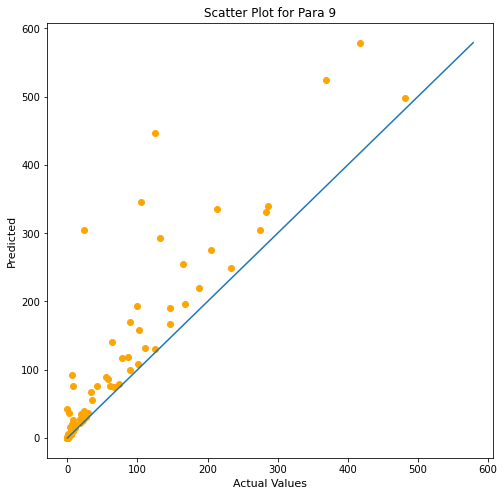

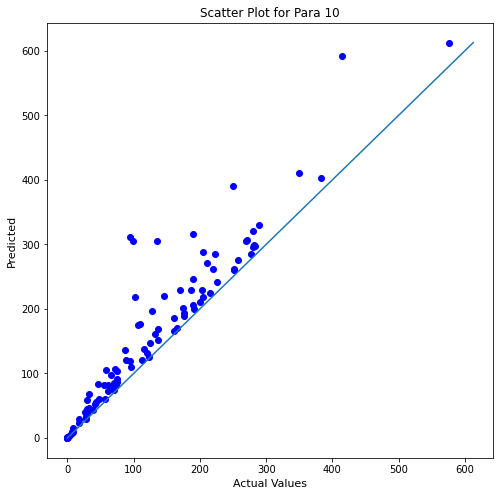

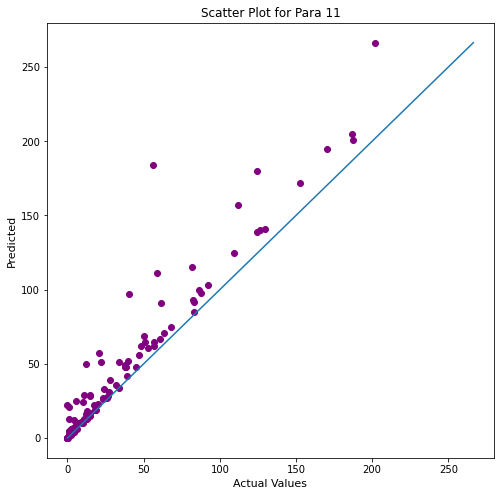

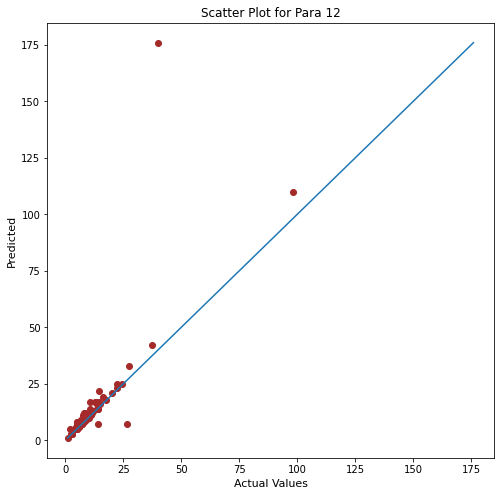

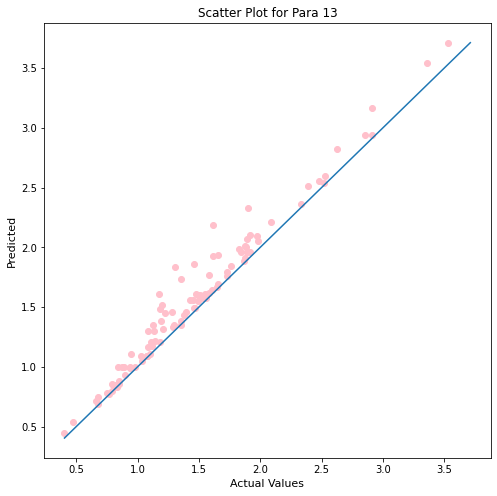

In [31]:
print((sum(root_mean)/n)**0.5)

predicted = test_data.iloc[:,10]
true = predicted_data.iloc[:,0]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='orange',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 9')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()

predicted = test_data.iloc[:,11]
true = predicted_data.iloc[:,1]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='blue',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 10')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()

predicted = test_data.iloc[:,12]
true = predicted_data.iloc[:,2]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='purple',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 11')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()

predicted = test_data.iloc[:,13]
true = predicted_data.iloc[:,3]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='brown',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 12')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()

predicted = test_data.iloc[:,14]
true = predicted_data.iloc[:,4]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='pink',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 13')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()
